In [62]:
import torch
import pickle
import torch.nn as nn
import torch.nn.functional as F

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import f1_score as f1

In [65]:
D= pd.read_csv('Diabetes.csv')

In [66]:
D.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
X = D.iloc[:,:-1]
y= D.iloc[:,-1]

In [68]:
X=D.drop('Outcome',axis=1).values
y=D['Outcome'].values

In [69]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [70]:
X.shape

(768, 8)

In [71]:
y.shape

(768,)

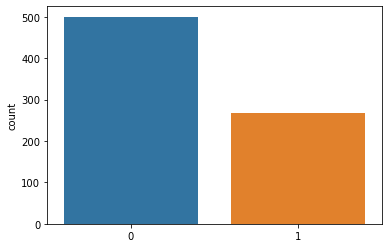

In [72]:
sns.countplot(y) #countplot of the target variable

####  The dataset is imbalanced so we may need to apply Smote/oversampling

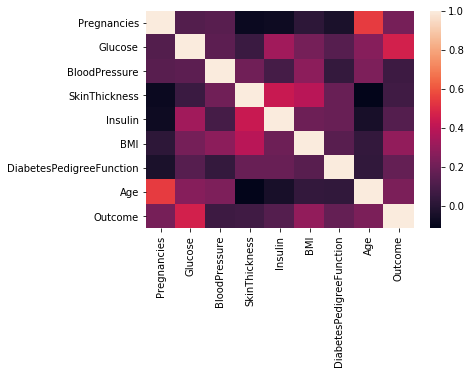

In [73]:
sns.heatmap(D.corr())

#### From the correlation plot we can see that the target variable is highly correlated to the Glucose variable

## Building the model without making any changes to dataset:

In [74]:
x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.25,random_state=1)

In [75]:
x_tr.shape

(576, 8)

In [76]:
x_tr=torch.FloatTensor(x_tr)
x_te=torch.FloatTensor(x_te)
y_tr=torch.LongTensor(y_tr)
y_te=torch.LongTensor(y_te)

In [77]:
x_tr

tensor([[  4.0000,  97.0000,  60.0000,  ...,  28.2000,   0.4430,  22.0000],
        [  5.0000, 111.0000,  72.0000,  ...,  23.9000,   0.4070,  27.0000],
        [  0.0000, 180.0000,  90.0000,  ...,  36.5000,   0.3140,  35.0000],
        ...,
        [ 13.0000, 126.0000,  90.0000,  ...,  43.4000,   0.5830,  42.0000],
        [  4.0000, 171.0000,  72.0000,  ...,  43.6000,   0.4790,  26.0000],
        [  9.0000, 102.0000,  76.0000,  ...,  32.9000,   0.6650,  46.0000]])

In [78]:
class NN(nn.Module):
    def __init__(self,input_features,hidden1, hidden2,out):
        super().__init__()
        self.f1=nn.Linear(input_features,hidden1)
        self.f2=nn.Linear(hidden1,hidden2)
        self.o=nn.Linear(hidden2,out)
    
    def Forward(self,x):
        x=F.relu(self.f1(x))
        x=F.relu(self.f2(x))
        x=self.o(x)
        return(x)
        
        

In [79]:
torch.manual_seed(0)
mod=NN(input_features=8,hidden1=20, hidden2=20,out=2)

In [80]:
loss_f=nn.CrossEntropyLoss()
opt=torch.optim.Adam(mod.parameters(),lr=0.001)

In [81]:
mod.parameters

<bound method Module.parameters of NN(
  (f1): Linear(in_features=8, out_features=20, bias=True)
  (f2): Linear(in_features=20, out_features=20, bias=True)
  (o): Linear(in_features=20, out_features=2, bias=True)
)>

In [82]:
epochs=600
loss=[]
for i in range(epochs):
    i+=1
    y_pr=mod.Forward(x_tr)
    l=loss_f(y_pr,y_tr)
    loss.append(l)
    if(i%30==1):
        print("The loss at epoch {} is {}".format(i,l.item()))
    opt.zero_grad()
    l.backward()
    opt.step()
        
    

The loss at epoch 1 is 0.9116016030311584
The loss at epoch 31 is 0.628893256187439
The loss at epoch 61 is 0.5955751538276672
The loss at epoch 91 is 0.5763880014419556
The loss at epoch 121 is 0.5629791617393494
The loss at epoch 151 is 0.5526726841926575
The loss at epoch 181 is 0.5429283976554871
The loss at epoch 211 is 0.5338433980941772
The loss at epoch 241 is 0.5252861976623535
The loss at epoch 271 is 0.516566812992096
The loss at epoch 301 is 0.5099794864654541
The loss at epoch 331 is 0.5034916400909424
The loss at epoch 361 is 0.4970857799053192
The loss at epoch 391 is 0.4913862645626068
The loss at epoch 421 is 0.48610979318618774
The loss at epoch 451 is 0.4808785617351532
The loss at epoch 481 is 0.4761814475059509
The loss at epoch 511 is 0.47185346484184265
The loss at epoch 541 is 0.46727097034454346
The loss at epoch 571 is 0.46329593658447266


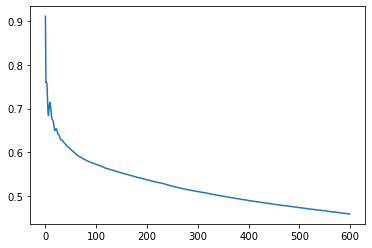

In [83]:
plt.plot(range(600),loss)

In [84]:
pred=[]
with torch.no_grad():
    for i,da in enumerate(x_te):
        yp=mod.Forward(da)
        pred.append(yp.argmax().item())
        print(yp.argmax().item())

0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
1
0
1
1
0
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1
1
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0


In [85]:
cm(y_te,pred)

array([[106,  17],
       [ 32,  37]], dtype=int64)

In [86]:
ac(y_te,pred)

0.7447916666666666

In [87]:
f1(y_te,pred)

0.6016260162601627

In [88]:
torch.save(mod,'diabetes_model.pt')

C:\Users\frank\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type NN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [89]:
pickle.dump(mod, open('model.pkl','wb'))

In [90]:
model = pickle.load(open('model.pkl','rb'))

In [91]:
p=model.Forward(x_te[1,:])

In [92]:
p.argmax().item()

1

## Model With Oversampled Data(Using imblearn)

In [93]:
from imblearn.over_sampling import RandomOverSampler

In [94]:
ros = RandomOverSampler(random_state=42)

In [95]:
X_res, y_res = ros.fit_resample(X, y)

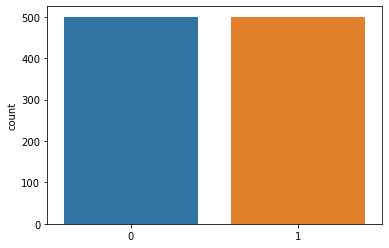

In [96]:
sns.countplot(y_res)

In [97]:
x_tr,x_te,y_tr,y_te=train_test_split(X_res,y_res,test_size=0.25,random_state=1)

In [98]:
x_tr=torch.FloatTensor(x_tr)
x_te=torch.FloatTensor(x_te)
y_tr=torch.LongTensor(y_tr)
y_te=torch.LongTensor(y_te)

In [99]:
epochs=600
loss=[]
for i in range(epochs):
    i+=1
    y_pr=mod.Forward(x_tr)
    l=loss_f(y_pr,y_tr)
    loss.append(l)
    if(i%30==1):
        print("The loss at epoch {} is {}".format(i,l.item()))
    opt.zero_grad()
    l.backward()
    opt.step()
        

The loss at epoch 1 is 0.5761165022850037
The loss at epoch 31 is 0.4911520481109619
The loss at epoch 61 is 0.47669216990470886
The loss at epoch 91 is 0.46973779797554016
The loss at epoch 121 is 0.4643374979496002
The loss at epoch 151 is 0.4593861997127533
The loss at epoch 181 is 0.45462894439697266
The loss at epoch 211 is 0.44983410835266113
The loss at epoch 241 is 0.44504204392433167
The loss at epoch 271 is 0.44044575095176697
The loss at epoch 301 is 0.4360356032848358
The loss at epoch 331 is 0.4318099021911621
The loss at epoch 361 is 0.42740535736083984
The loss at epoch 391 is 0.4231293499469757
The loss at epoch 421 is 0.41880717873573303
The loss at epoch 451 is 0.41477078199386597
The loss at epoch 481 is 0.4107432961463928
The loss at epoch 511 is 0.407173752784729
The loss at epoch 541 is 0.4033718705177307
The loss at epoch 571 is 0.3999224305152893


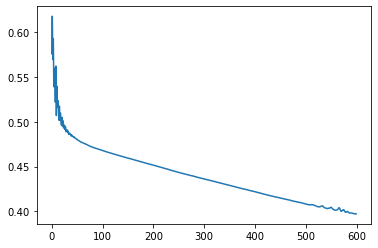

In [100]:
plt.plot(range(600),loss)

In [101]:
pred=[]
with torch.no_grad():
    for i,da in enumerate(x_te):
        yp=mod.Forward(da)
        pred.append(yp.argmax().item())
        print(yp.argmax().item())

0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
1
0
0
0
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
0
0
1
1
1
0
0
0
1
0
1
0
1
0
1
0
1
1
1
1
0
1
0
0
1
1
0
1
1
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
1
0
0
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0


In [102]:
cm(y_te,pred)

array([[97, 40],
       [17, 96]], dtype=int64)

In [103]:
ac(y_te,pred)

0.772

In [104]:
f1(y_te,pred)

0.7710843373493975

### As seen the F1 Score improved vastly. By oversampling the data we get a much better performing model 